## Inicialización

In [ ]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats

## Cargar datos

In [ ]:
# Cargar los df
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

## Tarifas

In [ ]:
# Imprimir la información general/resumida sobre el DataFrame de las tarifas
print(plans.head())
print(plans.info())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   pla

In [ ]:
# Imprimir una muestra de los datos para las tarifas
plans.sample(2)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [ ]:
# Crear columna con gb
plans['gb_per_month_included'] = plans['mb_per_month_included']/1024
plans.sample(2)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


In [6]:
plans.duplicated().sum()

0

Es una tabla muy sencilla y corta, donde solo se especifica la información de los dos tipos de planes: el ultimate y el surf. No tiene valores duplicados. Incluye los mensajes, mb y minutos de cada plan, así como el costo en caso de excederse en cualquiera de estos tres rubros. Solo identifiqué dos problemas:
1. Se tienen los mb incluidos, mientras la columna del costo en caso de exceso lo tiene en gb. Por lo que sería conveniente agregar una columna con los datos convertidos. 
2. También, convertiré la columna usd_per_gb a flotante, por si requiere cálculos en el futuro. 

## Corregir datos

In [ ]:
# Convertir columnas a su tipo adecuado
plans['usd_per_gb'] = plans['usd_per_gb'].astype(float)
plans.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      float64
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
 8   gb_per_month_included  2 non-null      float64
dtypes: float64(4), int64(4), object(1)
memory usage: 272.0+ bytes


## Enriquecer los datos

In [ ]:
# Crear columna gb
plans['gb_per_month_included'] = (plans['mb_per_month_included'] / 1024).apply(np.ceil).astype(int)
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      float64
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
 8   gb_per_month_included  2 non-null      int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 272.0+ bytes


## Usuarios/as

In [9]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [10]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [11]:
# Imprime una muestra de datos para usuarios
users.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
51,1051,Rosario,Gibbs,55,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-12-11,surf,NaN
298,1298,Loyce,Cooley,53,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",2018-09-21,surf,2018-12-19
340,1340,Vanna,Stanton,65,"Dallas-Fort Worth-Arlington, TX MSA",2018-07-05,surf,NaN
236,1236,Odell,Juarez,74,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-04-04,ultimate,NaN
384,1384,Dominique,Good,36,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-06-09,ultimate,NaN
417,1417,Jorge,Madden,51,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-06-22,ultimate,NaN
489,1489,Londa,Jenkins,72,"Detroit-Warren-Dearborn, MI MSA",2018-05-24,surf,NaN
327,1327,Natosha,Peck,20,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-17,surf,NaN
129,1129,Marin,Bolton,70,"Baton Rouge, LA MSA",2018-11-10,surf,2018-12-27
199,1199,Antonetta,Finley,39,"San Antonio-New Braunfels, TX MSA",2018-08-01,ultimate,NaN


In [ ]:
# Checar duplicados
users.duplicated().sum()

0

No hay valores duplicados. Las columnas reg_date y churn_date deben estar en formato de fecha. También, la columna churn_date presenta 466 valores nulos, los cuales se tienen que manejar.

### Corregir los datos

In [ ]:
# Convertir columnas a formato fecha
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [14]:
# Valores NaN: Por ahora se dejan así, al ser de formato dt no puedo puedo poner algo como 'usuario activo'
# Tendría que poner una fecha, una fecha actual se descarta porque daría por hecho que los usuarios sigan activos
#También se descarta poner el último día del año 2018 porque hay usuarios que tienen ese como su último día activo

In [15]:
users['churn_date'].max()

Timestamp('2018-12-31 00:00:00')

### Enriquecer los datos

## Llamadas

In [ ]:
# Info del df
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [17]:
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [18]:
calls.sample(10)

,id,user_id,call_date,duration
63619,1231_333,1231,2018-07-02,24.76
77792,1278_72,1278,2018-12-30,1.54
68334,1246_353,1246,2018-06-27,6.77
7186,1033_202,1033,2018-10-28,0.00
58307,1210_476,1210,2018-06-28,7.25
1166,1007_187,1007,2018-09-15,8.98
2572,1010_153,1010,2018-07-13,10.48
37393,1141_351,1141,2018-07-08,0.00
36845,1140_129,1140,2018-08-25,0.00
64615,1234_20,1234,2018-12-26,5.98


In [ ]:
# Checar duplicados
calls.duplicated().sum()

0

Todas las columnas tienen sus títulos bien escritos y no hay valores ausentes ni duplicados. La columna call_date tiene que convertirse a formato fecha. Es posible que sea conveniente redondear la columna duration hacia arriba para reflejar el cobro real. 

### Corregir los datos

In [20]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enriquecer los datos

In [ ]:
# Redondear la duración de las llamadas
calls['duration_rounded_up'] = np.ceil(calls['duration'])
calls.sample(5)

,id,user_id,call_date,duration,duration_rounded_up
13181,1057_60,1057,2018-12-02,9.12,10.0
124776,1440_292,1440,2018-10-28,2.76,3.0
102060,1362_824,1362,2018-07-27,12.29,13.0
100061,1358_509,1358,2018-09-09,14.33,15.0
91316,1329_99,1329,2018-09-14,0.00,0.0


## Mensajes

In [ ]:
# Info del df
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [23]:
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [24]:
messages.sample(10)

,id,user_id,message_date
44758,1301_21,1301,2018-12-31
46508,1316_407,1316,2018-07-05
38783,1254_412,1254,2018-11-12
40508,1261_150,1261,2018-05-25
28702,1174_492,1174,2018-06-26
22486,1133_690,1133,2018-08-27
73157,1470_785,1470,2018-06-05
58633,1373_51,1373,2018-10-24
22831,1137_80,1137,2018-10-17
59853,1380_344,1380,2018-11-28


In [ ]:
# Checar duplicados
messages.duplicated().sum()

0

El dataframe no tiene valores ausentes ni duplicados. La columna message_date debe convertirse a formato fecha. 

### Corregir los datos

In [ ]:
# Colocar columna en su tipo adecuado
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

## Internet

In [ ]:
# Checar info del df
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [28]:
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [29]:
internet.sample(10)

,id,user_id,session_date,mb_used
53888,1244_6,1244,2018-12-12,483.12
95137,1444_88,1444,2018-09-15,196.31
44954,1199_227,1199,2018-12-12,127.20
101361,1483_164,1483,2018-05-15,178.07
44908,1199_158,1199,2018-11-13,207.86
18622,1083_8,1083,2018-11-06,58.55
79949,1374_25,1374,2018-06-21,660.80
95002,1443_72,1443,2018-12-22,454.13
85662,1399_273,1399,2018-08-13,925.38
59200,1267_2,1267,2018-12-21,318.91


In [ ]:
# Verificar duplicados
internet.duplicated().sum()

0

In [ ]:
# Agrupar los mb usados por user_id
print(internet.groupby('user_id')['mb_used'].sum())

user_id
1000      1901.47
1001     80437.94
1002     40293.33
1003     27044.14
1004    156352.81
          ...    
1495     98890.96
1496     64268.64
1497     11106.55
1498    227525.13
1499     71350.23
Name: mb_used, Length: 489, dtype: float64


El dataframe no tiene valores ausentes ni duplicados. La columna session_date debe convertirse a formato fecha. 

### Corregir los datos

In [ ]:
# Convertir columna session_date a formato fecha
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

## Estudiar las condiciones de las tarifas

In [33]:
plans.sample(2)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10.0,0.03,0.03,surf,15
1,1000,30720,3000,70,7.0,0.01,0.01,ultimate,30


## Agregar datos por usuario

In [34]:
# Número de llamadas hechas por cada usuario al mes
calls['month'] = calls['call_date'].dt.month
calls_per_user_month = calls.groupby(['user_id', 'month']).size().reset_index(name='calls_made')
calls_per_user_month.sample(5)

,user_id,month,calls_made
1154,1251,10,87
1296,1282,12,74
943,1201,11,65
225,1054,6,32
327,1071,7,81


In [35]:
calls_per_user_month[calls_per_user_month['user_id']==1018]

,user_id,month,calls_made
67,1018,10,25
68,1018,11,86
69,1018,12,71


In [36]:
# Cantidad de minutos usados por cada usuario al mes 
minutes_per_user_month = calls.groupby(['user_id','month'])['duration'].sum().reset_index(name='total_duration')
minutes_per_user_month.sample(5)

,user_id,month,total_duration
1202,1259,8,189.45
2216,1491,11,389.93
628,1138,2,287.17
1467,1326,11,944.47
1610,1357,7,621.75


In [37]:
minutes_per_user_month[minutes_per_user_month['user_id']==1018]

,user_id,month,total_duration
67,1018,10,173.67
68,1018,11,601.88
69,1018,12,447.90


In [38]:
# Número de mensajes enviados por cada usuario al mes
messages['month'] = messages['message_date'].dt.month
messages_per_user_month = messages.groupby(['user_id', 'month']).size().reset_index(name='total_messages')
messages_per_user_month.sample(5)

,user_id,month,total_messages
463,1128,10,37
1090,1291,10,14
928,1249,9,47
1421,1382,6,14
256,1077,4,57


In [39]:
messages_per_user_month[messages_per_user_month['user_id']==1018]

,user_id,month,total_messages
48,1018,10,3
49,1018,11,5
50,1018,12,8


In [40]:
# Volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet['month'] = internet['session_date'].dt.month
internet_per_user_month = internet.groupby(['user_id', 'month']).sum().reset_index()
internet_per_user_month.sample(5)

,user_id,month,mb_used
1701,1366,9,18379.32
342,1073,7,15329.24
1454,1318,9,442.71
453,1097,10,17220.95
1289,1273,12,18176.59


In [41]:
internet_per_user_month['gb_used'] = np.ceil(internet_per_user_month['mb_used'] / 1024)
internet_per_user_month.sample(5)

,user_id,month,mb_used,gb_used
1438,1313,11,19690.12,20.0
1719,1369,11,14111.37,14.0
863,1181,7,15644.34,16.0
1865,1401,12,8407.64,9.0
1234,1260,12,19766.78,20.0


In [42]:
internet_per_user_month[internet_per_user_month['user_id']==1018]

,user_id,month,mb_used,gb_used
67,1018,10,8722.35,9.0
68,1018,11,15266.53,15.0
69,1018,12,17390.55,17.0


In [43]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
user_month_data = pd.merge(calls_per_user_month, minutes_per_user_month, on=['user_id', 'month'], how='outer')
user_month_data = pd.merge(user_month_data, messages_per_user_month, on=['user_id', 'month'], how='outer')
user_month_data = pd.merge(user_month_data, internet_per_user_month, on=['user_id', 'month'], how='outer')
user_month_data.fillna(0, inplace=True)
user_month_data.sample(10)

,user_id,month,calls_made,total_duration,total_messages,mb_used,gb_used
2120,1467,10,61.0,383.97,54.0,21104.02,21.0
681,1147,8,124.0,932.61,27.0,32962.14,33.0
423,1090,8,48.0,314.57,22.0,22497.53,22.0
1636,1361,7,52.0,358.73,41.0,10531.35,11.0
1588,1353,5,15.0,92.99,0.0,4799.35,5.0
126,1036,6,19.0,152.25,19.0,1449.37,2.0
1494,1331,12,44.0,343.10,87.0,19941.42,20.0
1825,1400,6,69.0,450.34,0.0,14502.51,15.0
1364,1300,12,75.0,404.89,0.0,24325.88,24.0
2180,1483,6,69.0,463.94,5.0,12991.18,13.0


In [44]:
# Añade la información de la tarifa
user_month_data = user_month_data.merge(users[['user_id', 'plan']], on='user_id', how='left')
user_month_data.sample(10)

,user_id,month,calls_made,total_duration,total_messages,mb_used,gb_used,plan
1315,1289,12,111.0,639.96,61.0,18661.41,19.0,ultimate
951,1203,6,62.0,448.16,34.0,13544.97,14.0,surf
537,1115,11,44.0,325.77,33.0,5528.17,6.0,surf
1098,1240,7,164.0,1112.88,9.0,34750.43,34.0,surf
1533,1338,11,95.0,740.35,0.0,11790.83,12.0,surf
1146,1250,12,69.0,359.07,79.0,8733.20,9.0,ultimate
1400,1312,7,55.0,337.71,23.0,27213.75,27.0,surf
1245,1268,5,75.0,528.71,37.0,36672.29,36.0,surf
1113,1243,12,50.0,383.42,24.0,28824.21,29.0,surf
743,1159,11,119.0,813.42,94.0,13825.28,14.0,ultimate


In [45]:
user_month_data.rename(columns={'plan':'plan_name'},inplace=True)
user_month_data.sample(10)

,user_id,month,calls_made,total_duration,total_messages,mb_used,gb_used,plan_name
1768,1389,7,78.0,461.55,0.0,17489.45,18.0,ultimate
1974,1433,9,28.0,173.29,45.0,8261.57,9.0,ultimate
2207,1490,11,55.0,427.72,0.0,25817.03,26.0,ultimate
1133,1247,10,81.0,496.68,110.0,14394.15,15.0,ultimate
810,1173,9,10.0,68.98,9.0,409.43,1.0,surf
299,1066,4,57.0,438.04,32.0,22187.52,22.0,surf
512,1110,8,56.0,257.67,59.0,24671.51,25.0,surf
1922,1417,9,81.0,542.60,7.0,14865.82,15.0,ultimate
860,1184,12,90.0,630.58,37.0,10254.82,11.0,ultimate
1744,1384,9,31.0,232.53,72.0,17950.09,18.0,ultimate


In [46]:
# Calcula el ingreso mensual para cada usuario
user_month_data = user_month_data.merge(plans, on='plan_name', how='left')
user_month_data.sample(10)

,user_id,month,calls_made,total_duration,total_messages,mb_used,gb_used,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
1081,1236,6,67.0,404.44,32.0,18925.44,19.0,ultimate,1000,30720,3000,70,7.0,0.01,0.01,30
1104,1241,9,72.0,457.15,20.0,9184.64,9.0,surf,50,15360,500,20,10.0,0.03,0.03,15
1226,1263,9,72.0,524.17,4.0,20920.94,21.0,surf,50,15360,500,20,10.0,0.03,0.03,15
1817,1399,8,44.0,344.89,27.0,22919.13,23.0,surf,50,15360,500,20,10.0,0.03,0.03,15
2074,1458,7,5.0,13.95,6.0,4700.98,5.0,ultimate,1000,30720,3000,70,7.0,0.01,0.01,30
254,1059,6,108.0,706.36,64.0,10894.02,11.0,ultimate,1000,30720,3000,70,7.0,0.01,0.01,30
1052,1228,10,24.0,174.07,3.0,8786.14,9.0,surf,50,15360,500,20,10.0,0.03,0.03,15
1645,1362,4,95.0,605.89,42.0,12415.19,13.0,surf,50,15360,500,20,10.0,0.03,0.03,15
265,1060,12,106.0,749.08,83.0,25061.82,25.0,surf,50,15360,500,20,10.0,0.03,0.03,15
807,1172,10,76.0,489.30,118.0,35075.21,35.0,surf,50,15360,500,20,10.0,0.03,0.03,15


In [48]:
# Calcular los cargos adicionales
user_month_data['extra_calls'] = np.maximum(user_month_data['total_duration'] - user_month_data['minutes_included'], 0)
user_month_data['extra_messages'] = np.maximum(user_month_data['total_messages'] - user_month_data['messages_included'], 0)
user_month_data['extra_data'] = np.maximum(user_month_data['gb_used'] - user_month_data['gb_per_month_included'], 0)


In [56]:
user_month_data.sample(10)

,user_id,month,calls_made,total_duration,total_messages,mb_used,gb_used,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,extra_calls,extra_messages,extra_data
1333,1293,8,52.0,411.23,50.0,17951.40,18.0,surf,50,15360,500,20,10.0,0.03,0.03,15,0.00,0.0,3.0
567,1122,11,66.0,350.75,28.0,16862.03,17.0,surf,50,15360,500,20,10.0,0.03,0.03,15,0.00,0.0,2.0
1236,1264,11,62.0,398.01,65.0,17529.26,18.0,ultimate,1000,30720,3000,70,7.0,0.01,0.01,30,0.00,0.0,0.0
918,1196,6,89.0,608.07,34.0,24669.37,25.0,ultimate,1000,30720,3000,70,7.0,0.01,0.01,30,0.00,0.0,0.0
59,1016,10,25.0,162.24,11.0,3669.91,4.0,surf,50,15360,500,20,10.0,0.03,0.03,15,0.00,0.0,0.0
1065,1232,5,91.0,582.94,2.0,15035.58,15.0,surf,50,15360,500,20,10.0,0.03,0.03,15,82.94,0.0,0.0
2090,1461,9,21.0,129.97,0.0,5254.08,6.0,surf,50,15360,500,20,10.0,0.03,0.03,15,0.00,0.0,0.0
1566,1346,9,50.0,398.60,61.0,18006.84,18.0,ultimate,1000,30720,3000,70,7.0,0.01,0.01,30,0.00,0.0,0.0
2008,1439,10,40.0,294.26,77.0,17702.60,18.0,surf,50,15360,500,20,10.0,0.03,0.03,15,0.00,27.0,3.0
1616,1358,6,57.0,462.52,3.0,16931.05,17.0,surf,50,15360,500,20,10.0,0.03,0.03,15,0.00,0.0,2.0


In [57]:
user_month_data['total_messages'].max()

266.0

In [59]:
# Calcular los costos adicionales
user_month_data['cost_extra_calls'] = user_month_data['usd_per_minute']*user_month_data['extra_calls']
user_month_data['cost_extra_messages'] = user_month_data['usd_per_message']*user_month_data['extra_messages']
user_month_data['cost_extra_internet'] = user_month_data['usd_per_gb']*user_month_data['extra_data']

In [60]:
user_month_data.sample(10)

,user_id,month,calls_made,total_duration,total_messages,mb_used,gb_used,plan_name,messages_included,mb_per_month_included,...,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,extra_calls,extra_messages,extra_data,cost_extra_calls,cost_extra_messages,cost_extra_internet
774,1165,11,22.0,114.98,42.0,18911.25,19.0,surf,50,15360,...,10.0,0.03,0.03,15,0.00,0.0,4.0,0.0000,0.00,40.0
1110,1242,12,31.0,219.84,64.0,9810.87,10.0,surf,50,15360,...,10.0,0.03,0.03,15,0.00,14.0,0.0,0.0000,0.42,0.0
2042,1447,12,85.0,552.38,71.0,37464.81,37.0,surf,50,15360,...,10.0,0.03,0.03,15,52.38,21.0,22.0,1.5714,0.63,220.0
1319,1291,5,79.0,529.04,11.0,14019.73,14.0,surf,50,15360,...,10.0,0.03,0.03,15,29.04,0.0,0.0,0.8712,0.00,0.0
1847,1403,9,27.0,203.03,0.0,35206.68,35.0,ultimate,1000,30720,...,7.0,0.01,0.01,30,0.00,0.0,5.0,0.0000,0.00,35.0
1243,1268,3,48.0,287.75,10.0,19992.19,20.0,surf,50,15360,...,10.0,0.03,0.03,15,0.00,0.0,5.0,0.0000,0.00,50.0
1694,1370,12,93.0,671.37,30.0,14854.91,15.0,ultimate,1000,30720,...,7.0,0.01,0.01,30,0.00,0.0,0.0,0.0000,0.00,0.0
2181,1483,7,96.0,639.00,10.0,13573.80,14.0,surf,50,15360,...,10.0,0.03,0.03,15,139.00,0.0,0.0,4.1700,0.00,0.0
884,1188,10,48.0,321.75,43.0,20608.20,21.0,ultimate,1000,30720,...,7.0,0.01,0.01,30,0.00,0.0,0.0,0.0000,0.00,0.0
869,1185,9,73.0,559.86,0.0,23561.83,24.0,ultimate,1000,30720,...,7.0,0.01,0.01,30,0.00,0.0,0.0,0.0000,0.00,0.0


In [61]:
# Calcular el ingreso mensual total
user_month_data['monthly_revenue'] = (
    user_month_data['usd_monthly_pay'] + 
    user_month_data['cost_extra_calls'] + 
    user_month_data['cost_extra_messages'] + 
    user_month_data['cost_extra_internet']
)
user_month_data.sample(10)

,user_id,month,calls_made,total_duration,total_messages,mb_used,gb_used,plan_name,messages_included,mb_per_month_included,...,usd_per_message,usd_per_minute,gb_per_month_included,extra_calls,extra_messages,extra_data,cost_extra_calls,cost_extra_messages,cost_extra_internet,monthly_revenue
431,1093,12,37.0,230.96,17.0,4837.79,5.0,surf,50,15360,...,0.03,0.03,15,0.00,0.0,0.0,0.0000,0.00,0.0,20.0000
1854,1404,11,81.0,559.77,12.0,13897.07,14.0,surf,50,15360,...,0.03,0.03,15,59.77,0.0,0.0,1.7931,0.00,0.0,21.7931
1878,1408,5,64.0,425.25,32.0,12856.42,13.0,surf,50,15360,...,0.03,0.03,15,0.00,0.0,0.0,0.0000,0.00,0.0,20.0000
1915,1415,12,70.0,464.82,0.0,20537.11,21.0,surf,50,15360,...,0.03,0.03,15,0.00,0.0,6.0,0.0000,0.00,60.0,80.0000
2008,1439,10,40.0,294.26,77.0,17702.60,18.0,surf,50,15360,...,0.03,0.03,15,0.00,27.0,3.0,0.0000,0.81,30.0,50.8100
1656,1363,11,39.0,245.75,34.0,16635.67,17.0,ultimate,1000,30720,...,0.01,0.01,30,0.00,0.0,0.0,0.0000,0.00,0.0,70.0000
80,1022,10,83.0,544.05,0.0,18961.41,19.0,surf,50,15360,...,0.03,0.03,15,44.05,0.0,4.0,1.3215,0.00,40.0,61.3215
1679,1367,11,20.0,97.13,0.0,17176.25,17.0,surf,50,15360,...,0.03,0.03,15,0.00,0.0,2.0,0.0000,0.00,20.0,40.0000
1771,1389,10,69.0,488.33,0.0,20259.49,20.0,ultimate,1000,30720,...,0.01,0.01,30,0.00,0.0,0.0,0.0000,0.00,0.0,70.0000
193,1048,11,39.0,245.10,0.0,10699.55,11.0,surf,50,15360,...,0.03,0.03,15,0.00,0.0,0.0,0.0000,0.00,0.0,20.0000


## Estudiar el comportamiento de usuario

### Llamadas

In [ ]:
# Agregar columna avg_call_duration y hacer tabla dinámica
user_month_data['avg_call_duration'] = user_month_data['total_duration'] / user_month_data['calls_made']
pivot_data = user_month_data.pivot_table(
    index='plan_name',
    columns='month',
    values='avg_call_duration',
    aggfunc='mean')
pivot_data

month,1,2,3,4,5,6,7,8,9,10,11,12
plan_name,,,,,,,,,,,,
surf,6.287143,6.442666,6.790425,6.655936,6.776897,6.803752,6.624139,6.727283,6.724899,6.705625,6.836930,6.815646
ultimate,5.847181,6.665898,5.999978,6.778641,6.731554,6.708107,6.927112,6.617208,6.720835,6.687726,6.631094,6.661323


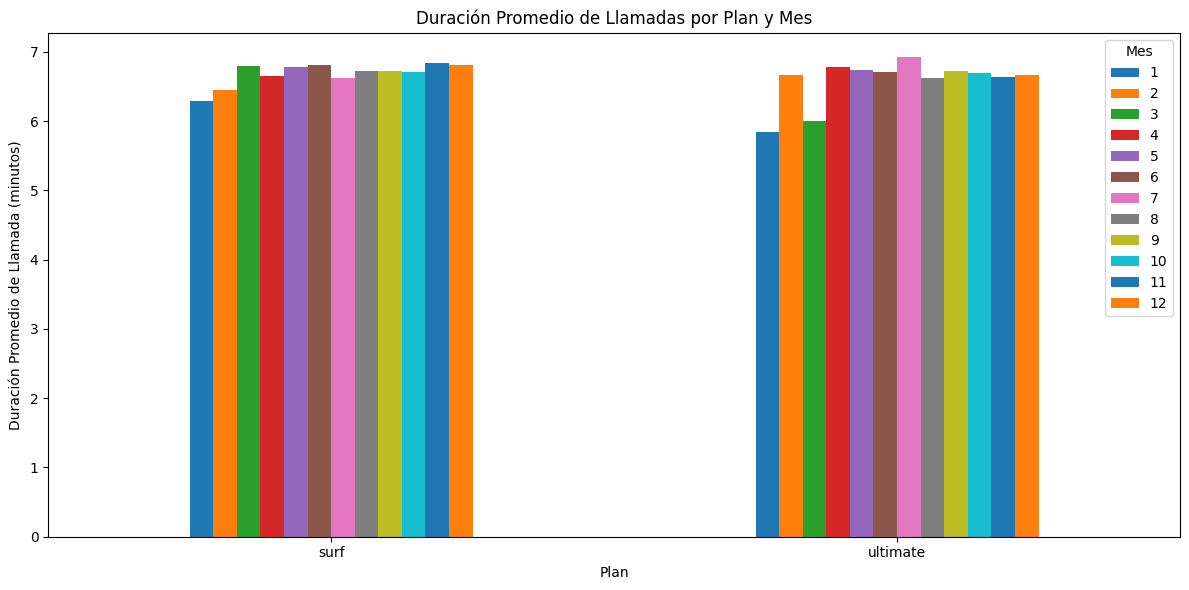

In [ ]:
# Graficar tabla dinámica
pivot_data.plot(kind='bar', figsize=(12, 6))

plt.title('Duración Promedio de Llamadas por Plan y Mes')
plt.xlabel('Plan')
plt.ylabel('Duración Promedio de Llamada (minutos)')
plt.legend(title='Mes')
plt.xticks(rotation=0)  
plt.tight_layout()

plt.show()

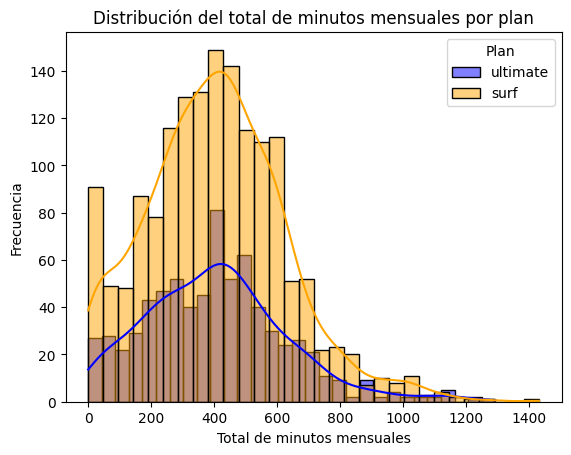

In [64]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
import seaborn as sns

colors = ['blue', 'orange']

for i, plan in enumerate(user_month_data['plan_name'].unique()):
    sns.histplot(
        data=user_month_data[user_month_data['plan_name'] == plan], 
        x='total_duration', 
        bins=30, 
        kde=True, 
        label=plan, 
        color=colors[i]  
    )

plt.title("Distribución del total de minutos mensuales por plan")
plt.xlabel("Total de minutos mensuales")
plt.ylabel("Frecuencia")
plt.legend(title="Plan")

plt.show()

In [ ]:
# Calcular la media y la varianza de la duración mensual de llamadas.
call_stats = user_month_data.groupby('plan_name')['total_duration'].agg(['mean', 'var']).reset_index()
call_stats.columns = ['plan', 'mean_call_duration', 'call_duration_variance']
call_stats.head()

,plan,mean_call_duration,call_duration_variance
0,surf,404.762390,49135.104891
1,ultimate,406.193083,51640.971402


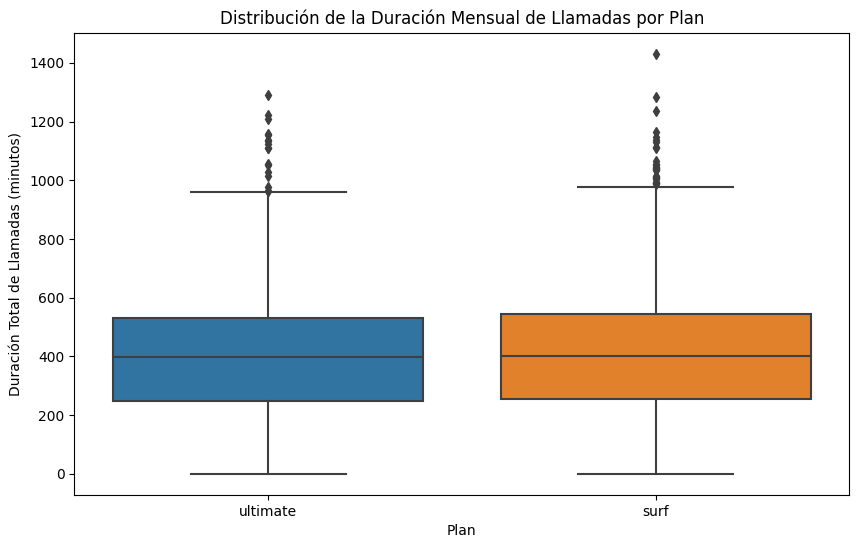

In [ ]:
# Diagrama de caja para visualizar la distribución de la duración mensual de llamadas
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=user_month_data, x='plan_name', y='total_duration')
plt.title('Distribución de la Duración Mensual de Llamadas por Plan')
plt.xlabel('Plan')
plt.ylabel('Duración Total de Llamadas (minutos)')
plt.show()

En el gráfico de barras se logra observar que la duración promedio de las llamadas parece bastante consistente entre ambos planes, los valores están cerca de 6 a 7 minutos, lo que sugiere que los usuarios de ambos planes tienden a usar una cantidad de tiempo similar por llamada en promedio. Esto se confirma en el cálculo de la media y la varianza, pues no tienen una diferencia significativa. Tampoco se observa una variación significativa entre los meses. Después, en el histograma, vemos que el plan Surf muestra una mayor cantidad de uso en minutos y datos en las gráficas, lo que indica una preferencia por el plan más económico, los usuarios podrían estas dispuestos a pagar cargos adicionales al superar los límites. Finalmente, en el diagrama de caja y bigotes podemos ver que el uso central, incluyendo la mediana y el rango intercuartil, es muy similar en ambos planes. El plan Surf muestra una mayor cantidad de valores atípicos, lo que significa que una parte de los usuarios están consumiendo más minutos de lo esperado y probablemente estén pagando cargos adicionales.  

### Mensajes

In [ ]:
# Comparar el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
pivot_data_messages = user_month_data.pivot_table(
    index='plan_name',
    columns='month',
    values='total_messages',
    aggfunc='sum')
pivot_data_messages

month,1,2,3,4,5,6,7,8,9,10,11,12
plan_name,,,,,,,,,,,,
surf,21.0,108.0,351.0,870.0,1849.0,2454.0,3271.0,4662.0,5968.0,8020.0,9165.0,12275.0
ultimate,62.0,151.0,243.0,463.0,931.0,1379.0,1937.0,2732.0,3259.0,4181.0,4903.0,6796.0


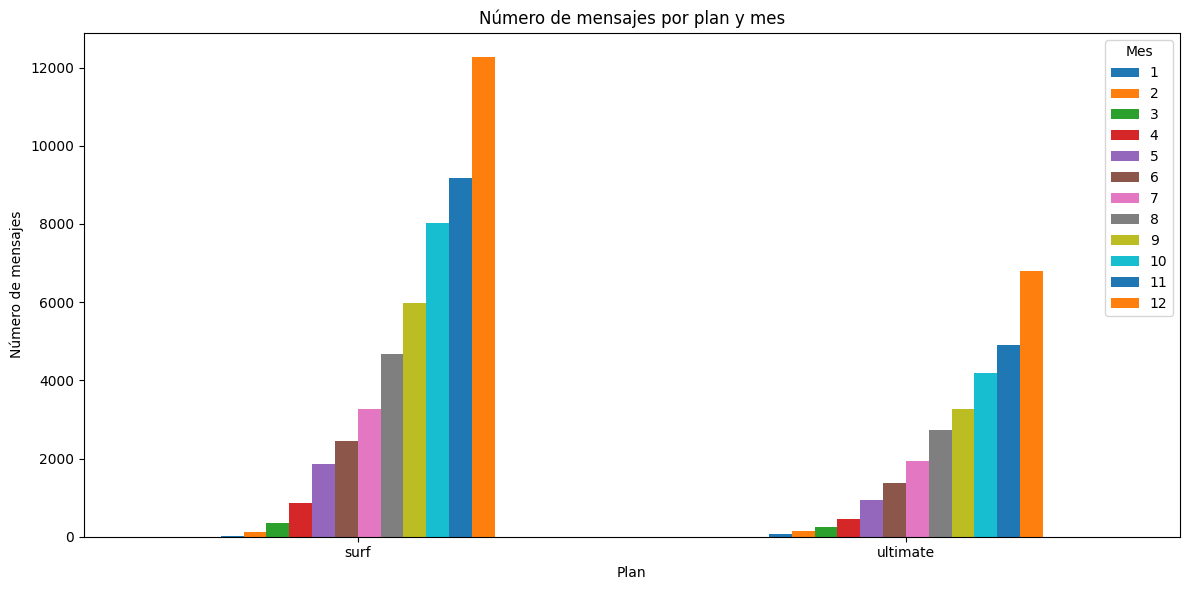

In [ ]:
# Graficar la comparación previa
pivot_data_messages.plot(kind='bar', figsize=(12, 6))

plt.title('Número de mensajes por plan y mes')
plt.xlabel('Plan')
plt.ylabel('Número de mensajes')
plt.legend(title='Mes')
plt.xticks(rotation=0)  
plt.tight_layout()

plt.show()

In [ ]:
# Obtener la media y varianza por plan
messages_stats = user_month_data.groupby('plan_name')['total_messages'].agg(['mean', 'var']).reset_index()
messages_stats.columns = ['plan', 'messages_mean', 'messages_variance']
messages_stats.head()

,plan,messages_mean,messages_variance
0,surf,31.159568,1126.724522
1,ultimate,37.551389,1208.756744


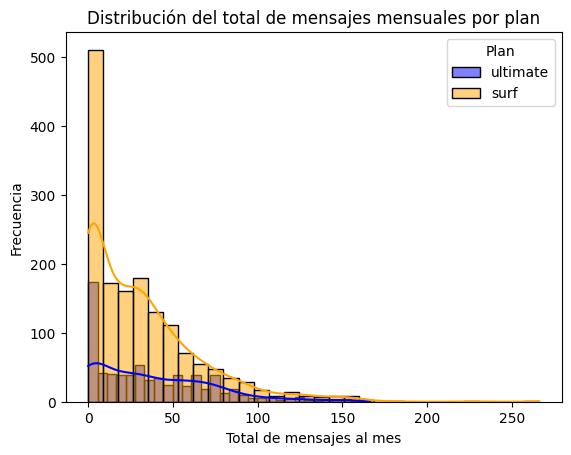

In [ ]:
# Graficar la distribución del total de mensajes mensuales por plan
colors = ['blue', 'orange']

for i, plan in enumerate(user_month_data['plan_name'].unique()):
    sns.histplot(
        data=user_month_data[user_month_data['plan_name'] == plan], 
        x='total_messages', 
        bins=30, 
        kde=True, 
        label=plan, 
        color=colors[i]  
    )

plt.title("Distribución del total de mensajes mensuales por plan")
plt.xlabel("Total de mensajes al mes")
plt.ylabel("Frecuencia")
plt.legend(title="Plan")

plt.show()

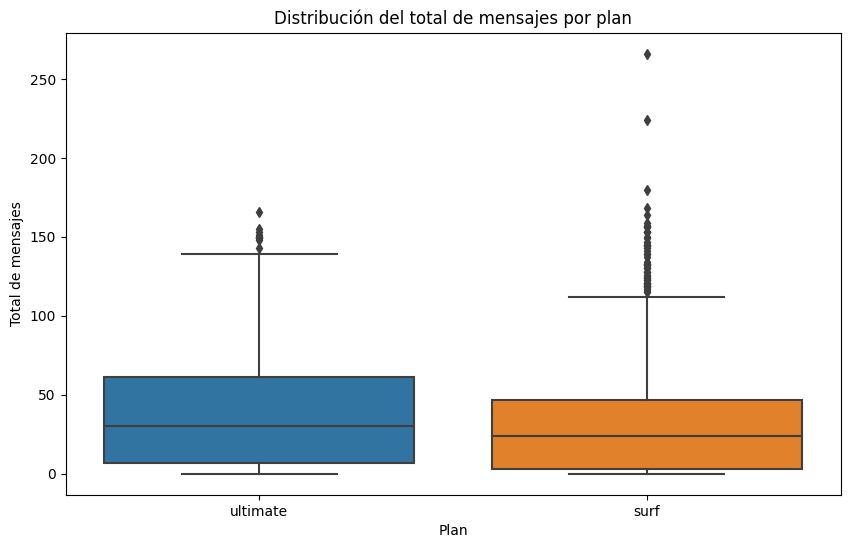

In [ ]:
# Graficar boxplots de la distribución previamente mencionada
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=user_month_data, x='plan_name', y='total_messages')
plt.title('Distribución del total de mensajes por plan')
plt.xlabel('Plan')
plt.ylabel('Total de mensajes')
plt.show()

En el gráfico de barras se logra observar que hay una diferencia significativa de los mensajes enviados entre ambos planes, pues el total del plan Surf es mayor que el Ultimate. Esto podría indicar que plan de Surf tiene más usuarios. También, se nota una gran variabilidad mes a mes en ambos planes. Al parecer enero es el mes con menos mensajes y diciembre el que más. Es un crecimiento exponencial de mes a mes. La media es más grande en el plan Ultimate, lo cual es lógico, pues al parecer cada usuario del Ultimate tiene un mayor límite de mensajes incluido. También, el plan Ultimate presenta una mayor varianza en el número de mensajes. En el histograma confirmamos la información, el plan Surf tiene más mensajes que el Ultimate. En el diagrama de caja y bigotes logramos ver que el rango intercuartil en el Ultimate es mayor que el de Surf, lo cual significa que el rango central de los mensajes es mayor. Finalmente, vemos que ambos planes tienen valores atípicos, sin embargo el plan Surf muestra valores muy atípicos, muy alejados del límite, lo que significa que algunos usuarios deberían considerar el plan Ultimate, pues seguramente están pagando mucho en recargos. 

### Internet

In [73]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
pivot_data_internet = user_month_data.pivot_table(
    index='plan_name',
    columns='month',
    values='gb_used',
    aggfunc='sum')
pivot_data_internet

month,1,2,3,4,5,6,7,8,9,10,11,12
plan_name,,,,,,,,,,,,
surf,10.0,110.0,312.0,611.0,1087.0,1502.0,2042.0,2735.0,3238.0,4126.0,4650.0,5800.0
ultimate,29.0,121.0,221.0,343.0,489.0,725.0,973.0,1267.0,1463.0,1878.0,2174.0,2778.0


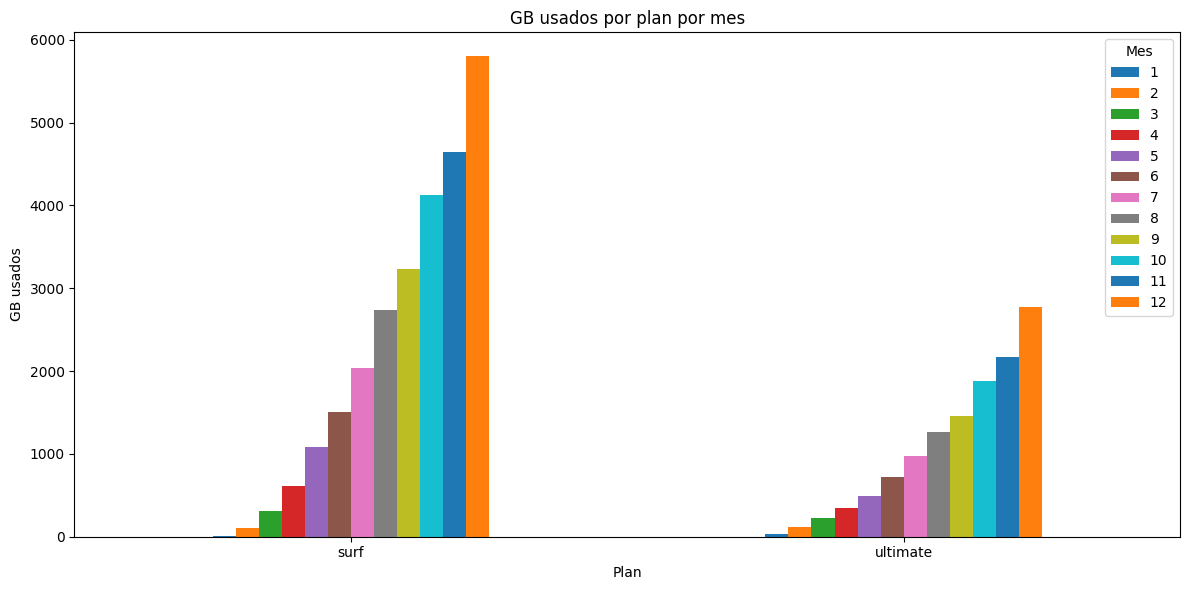

In [ ]:
# Graficar GB usados por plan por mes
pivot_data_internet.plot(kind='bar', figsize=(12, 6))

plt.title('GB usados por plan por mes')
plt.xlabel('Plan')
plt.ylabel('GB usados')
plt.legend(title='Mes')
plt.xticks(rotation=0)  
plt.tight_layout()

plt.show()

In [ ]:
# Obtener media y varianza de los gb usados por plan
internet_stats = user_month_data.groupby('plan_name')['gb_used'].agg(['mean', 'var']).reset_index()
internet_stats.columns = ['plan', 'gb_used_mean', 'gb_used_variance']
internet_stats.head()

,plan,gb_used_mean,gb_used_variance
0,surf,16.670693,61.58360
1,ultimate,17.306944,58.83055


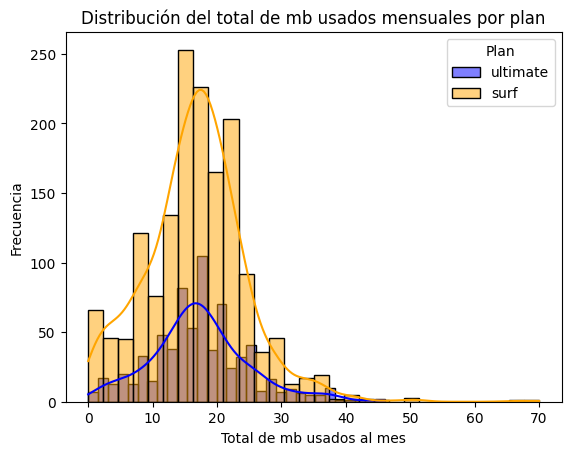

In [ ]:
# Graficar distribución de mb usados mensuales por plan
colors = ['blue', 'orange']

for i, plan in enumerate(user_month_data['plan_name'].unique()):
    sns.histplot(
        data=user_month_data[user_month_data['plan_name'] == plan], 
        x='gb_used', 
        bins=30, 
        kde=True, 
        label=plan, 
        color=colors[i]  
    )

plt.title("Distribución del total de mb usados mensuales por plan")
plt.xlabel("Total de mb usados al mes")
plt.ylabel("Frecuencia")
plt.legend(title="Plan")

plt.show()

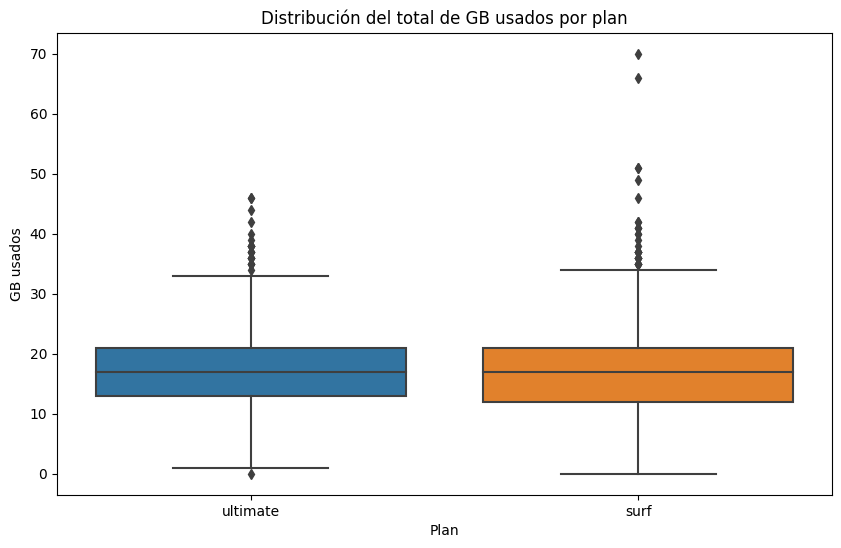

In [83]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=user_month_data, x='plan_name', y='gb_used')
plt.title('Distribución del total de GB usados por plan')
plt.xlabel('Plan')
plt.ylabel('GB usados')
plt.show()

En el gráfico de barras  y el histograma se logra observar que hay una diferencia significativa entre ambos planes en gb usados, pues el total del plan Surf es mayor que el Ultimate. Esto sigue afirmando la teoría de que hay más usuarios en el plan Surf. También, se nota una gran variabilidad mes a mes en ambos planes. Al parecer enero es el mes con menos mensajes y diciembre el que más. Es un crecimiento exponencial de mes a mes. La media es más grande en el plan Ultimate, pero no por mucho, se trata de menos de 1 GB de diferencia. Considerando que el plan Ultimate incluye 30 GB y el Surf 15 GB, no es una diferencia significativa. La varianza en el Surf es mayor. Finalmente, en el diagrama de caja y bigotes, se logra observar que los datos centrados son muy similares en ambos planes, es decir, la mediana y los cuartiles, incluso los límites. Sin embargo,  al igual que en el diagrama de número de mensajes, se observa que el número de valores atípicos es mucho más grande en el plan Surf, lo cual indica que muchos usuarios consumen mucho más de lo normal y seguramente están pagando cargos extra, deberían considerar cambiarse al plan Ultimate. 

## Ingreso

In [ ]:
# Tabla dinámica de ingresos mensuales por plan
pivot_data_ingreso = user_month_data.pivot_table(
    index='plan_name',
    columns='month',
    values='monthly_revenue',
    aggfunc='sum')
pivot_data_ingreso

month,1,2,3,4,5,6,7,8,9,10,11,12
plan_name,,,,,,,,,,,,
surf,40.0,308.3106,1053.176,2022.735,3637.1069,4746.2813,7528.855,10298.755,11242.0168,15416.0702,16308.9542,22292.6546
ultimate,280.0,490.0000,896.000,1533.000,2051.0000,3367.0000,4242.000,5173.000,6195.0000,7665.0000,9107.0000,11067.0000


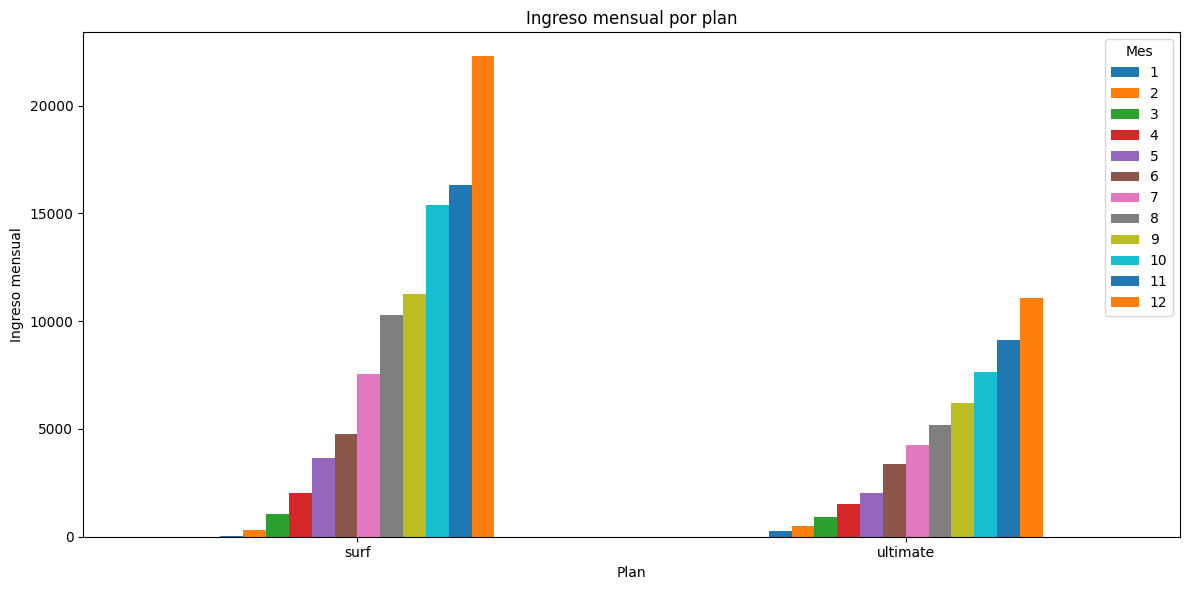

In [ ]:
# Graficar ingreso mensual por plan
pivot_data_ingreso.plot(kind='bar', figsize=(12, 6))

plt.title('Ingreso mensual por plan')
plt.xlabel('Plan')
plt.ylabel('Ingreso mensual')
plt.legend(title='Mes')
plt.xticks(rotation=0)  
plt.tight_layout()

plt.show()

In [ ]:
# Obtener media y varianza del ingreso mensual por plan
revenue_stats = user_month_data.groupby('plan_name')['monthly_revenue'].agg(['mean', 'var']).reset_index()
revenue_stats.columns = ['plan', 'monthly_revenue_mean', 'monthly_revenue_variance']
revenue_stats.head()

,plan,monthly_revenue_mean,monthly_revenue_variance
0,surf,60.327346,3053.955465
1,ultimate,72.313889,129.848486


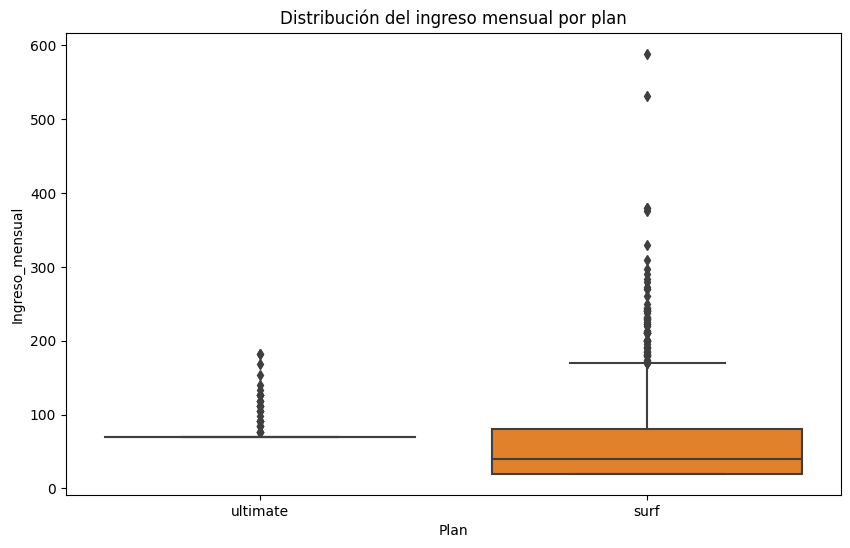

In [ ]:
# Graficar distribución del ingreso mensual por plan
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=user_month_data, x='plan_name', y='monthly_revenue')
plt.title('Distribución del ingreso mensual por plan')
plt.xlabel('Plan')
plt.ylabel('Ingreso_mensual')
plt.show()

En el gráfico de barras se puede observar que el plan ‘Surf’ genera significativamente más empleos que el ‘Ultimate’. También, se pude observar que los ingresos varían mes a mes, siendo enero el mes que menos ingresos genera y diciembre el que más. Como es de esperarse, el promedio del plan ‘Ultimate’ es mayor que el ‘Surf’. Sin embargo, llama la atención que la varianza en el plan ‘Surf’ es muchísimo más grande que la del ‘Ultimate’, lo cual indica que mientras en el ‘Ultimate’ casi todos pagan una cantidad cercana a la tarifa fija, en el ‘Surf’ muchos usuarios sobrepasan el límite, lo cual los lleva a pagar costos extra. Esto se confirma en el diagrama de caja y bigotes, pues el ‘Ultimate’ presenta los datos muy centrados, mientras el ‘Surf’ tiene muchos valores atípicos. Muchos de los usuarios de ‘Surf’ deberían considerar cambiarse al ‘Ultimate’.

## Probar hipótesis estadísticas

In [88]:
# H0:μUltimate=μSurf
# H1:μUltimate<>μSurf
# Debido a que las pruebas son de dos grupos independientes, se usará la prueba t

from scipy import stats as st
alpha = 0.05
ingresos_ultimate = user_month_data[user_month_data['plan_name'] == 'ultimate']['monthly_revenue']
ingresos_surf = user_month_data[user_month_data['plan_name'] == 'surf']['monthly_revenue']
results = st.ttest_ind(ingresos_ultimate, ingresos_surf, equal_var=False)
print('valor p:', results.pvalue)
if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 3.5320199509520717e-16
Rechazamos la hipótesis nula


In [89]:
user_month_data = user_month_data.merge(users[['user_id', 'city']], on='user_id', how='left')

In [90]:
user_month_data['city'].unique()

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Las Vegas-Henderson-Paradise, NV MSA', 'Tulsa, OK MSA',
       'Dallas-Fort Worth-Arlington, TX MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Grand Rapids-Kentwood, MI MSA',
       'Orlando-Kissimmee-Sanford, FL MSA',
       'San Jose-Sunnyvale-Santa Clara, CA MSA',
       'Cleveland-Elyria, OH MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA', 'Knoxville, TN MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA', 'Pittsburgh, PA MSA',
       'Fresno, CA MSA',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA', 'Jacksonville, FL MSA',
       'Los Angeles-Long Beach-Anaheim, CA MSA',
       'Omaha-Council Bluffs, NE-IA MSA',
       'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Tampa-St. Petersburg-Clearwater, FL MSA',
       'Birmingham-Hoover, AL MSA'

In [91]:
user_month_data['city'].sample()

1963    Phoenix-Mesa-Chandler, AZ MSA
Name: city, dtype: object

In [92]:
# H0:μNY-NJ=μotras_regiones
# H1:μNY-NJ=μotras regiones
from scipy import stats as st
alpha = 0.05
ingreso_ny_nj = user_month_data[user_month_data['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['monthly_revenue']
ingreso_otros = user_month_data[user_month_data['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['monthly_revenue']
results = st.ttest_ind(ingreso_ny_nj, ingreso_otros, equal_var=False)
print('valor p:', results.pvalue)
if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 0.031214139070912954
Rechazamos la hipótesis nula


## Conclusión general

1. Primero que nada, importé los datos y expliqué en dicha sección la razón de la modificación de las columnas. 
2. Después, en la sección 'Agregar datos por usuario', fui armando el df 'user_month_data' donde fui seleccionando información relevante y agregando nuevas columnas mediante cálculos, tales como los costos extra por usuario y mes, sus gastos totales extra, entre otros. Esto para dejar todo preparado para la siguiente sección. 
3. En la siguiente sección se estudió el comportamiento del usuario en sus llamadas, mensajes e internet mediante gráficas de barras, de distribución y de caja y bigotes. Así como su promedio y varianza por usuario. Esto nos dio muchos indicios y sus respectivas conclusiones están al final de cada sección.
4. Finalmente realicé las pruebas de hipótesis para concluir estadísticamente que los ingresos por plan varían, algo que ya se había inferido gracias a las gráficas anteriores. También, se demostró que el ingreso en la región NY-NJ varía respecto a las demás regiones. 